In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [172]:
df = pd.read_csv('Train_Data.csv')

In [173]:
df_test = pd.read_csv('Test_Data.csv')

In [4]:
df.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [5]:
df_test.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0


In [6]:
df.shape

(4571, 9)

In [7]:
df_test.shape

(318, 8)

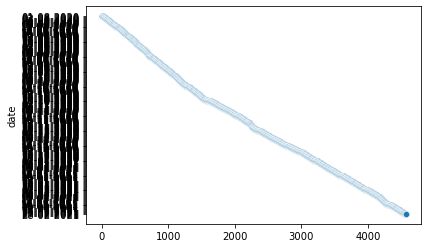

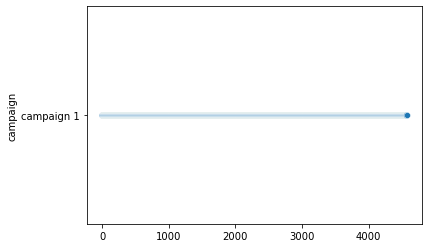

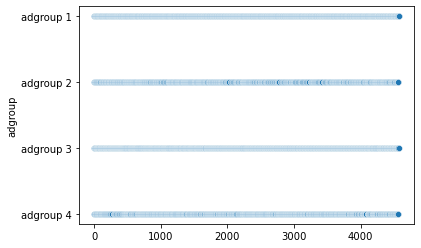

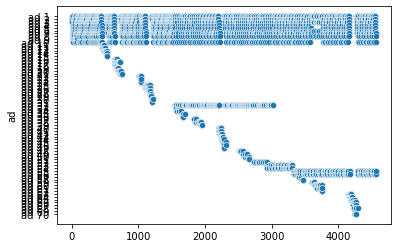

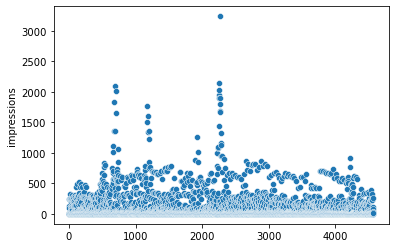

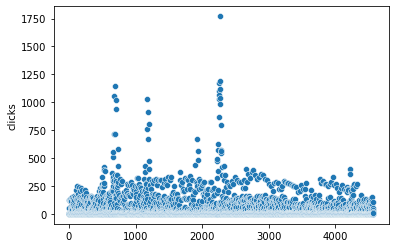

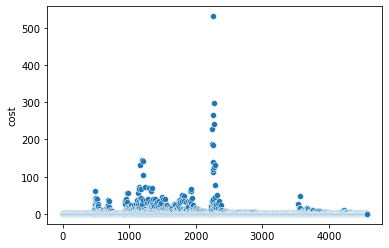

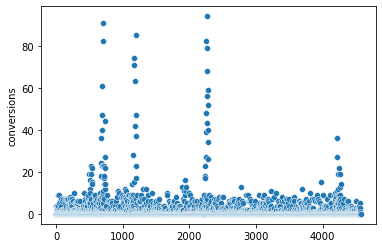

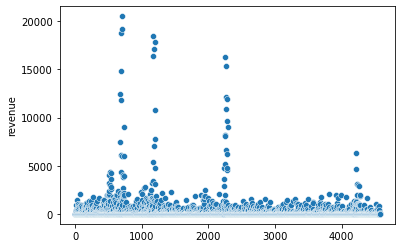

In [8]:
for col in df.columns:
    sns.scatterplot(data = df[col])
    plt.show()

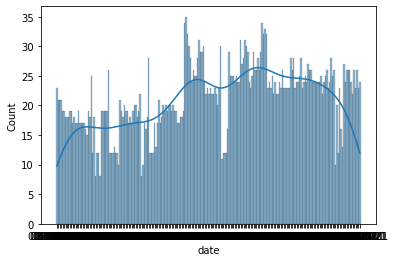

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


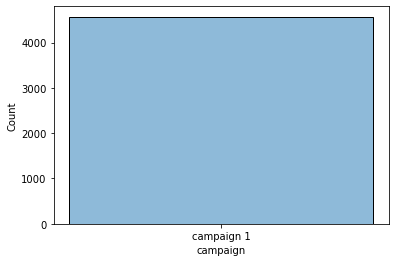

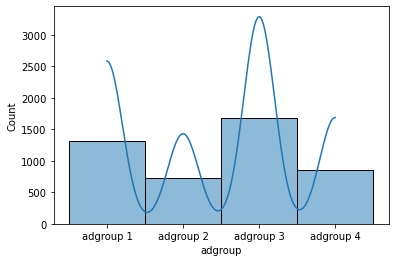

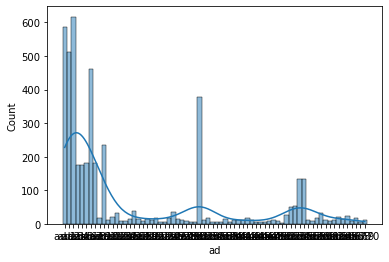

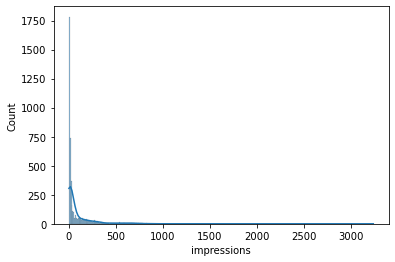

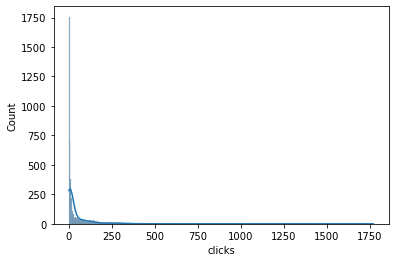

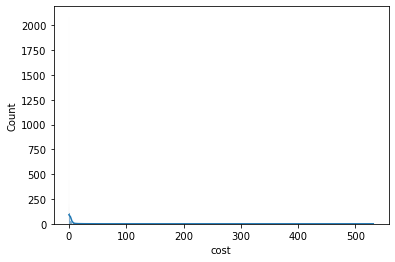

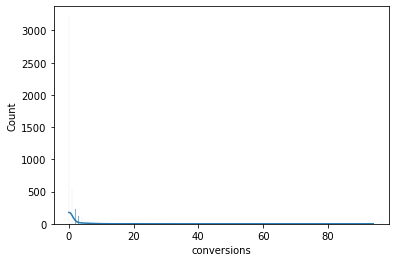

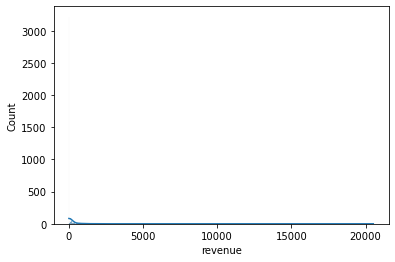

In [9]:
for col in df.columns:
    sns.histplot(df[col], kde = True)
    plt.show()

<AxesSubplot:xlabel='adgroup', ylabel='impressions'>

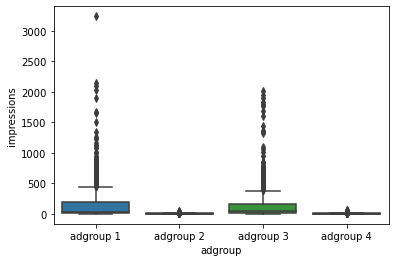

In [10]:
sns.boxplot(x = df.adgroup, y = df.impressions)
# data[["label", "tempo"]]

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-11-7364fe693bec>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-11-7364fe693bec>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


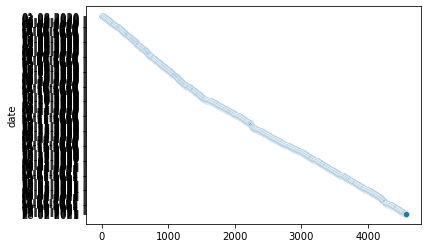

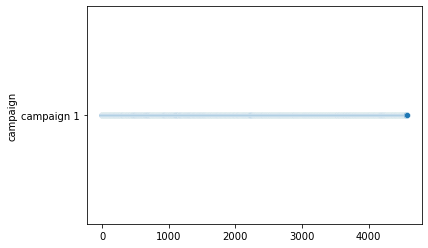

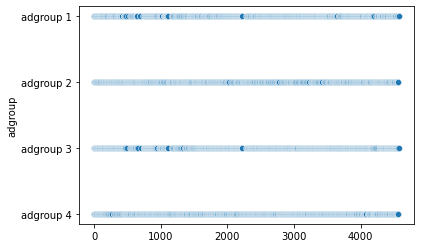

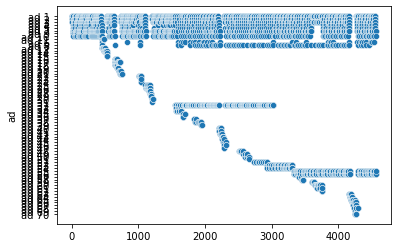

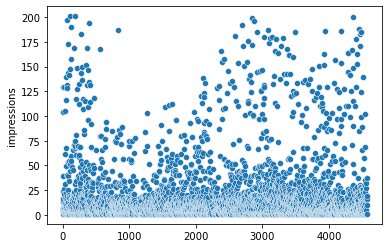

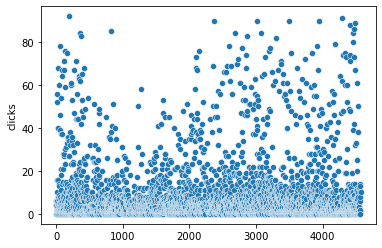

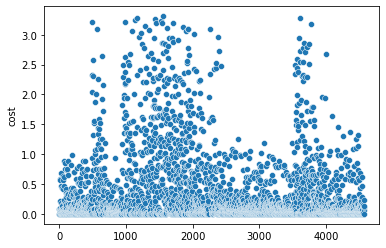

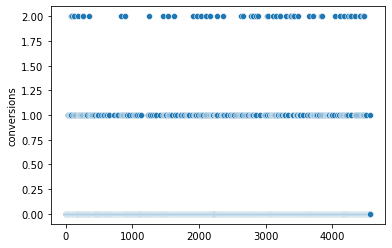

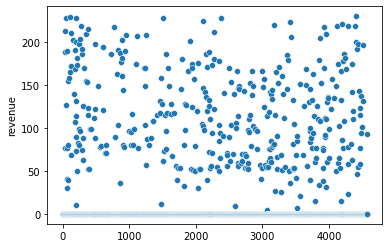

In [12]:
for col in df.columns:
    sns.scatterplot(data = df[col])
    plt.show()

In [13]:
df.shape

(3457, 9)

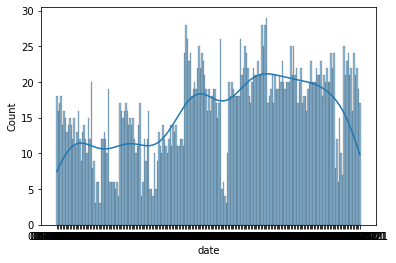

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


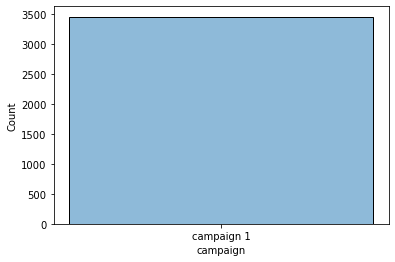

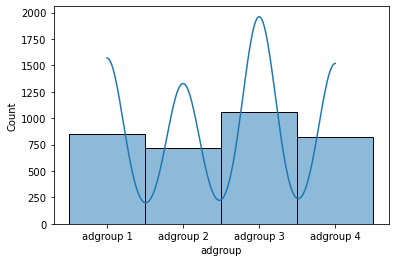

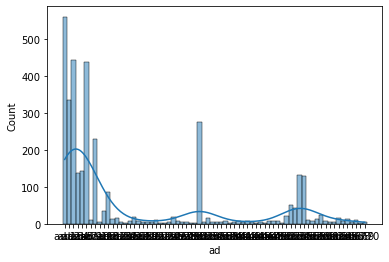

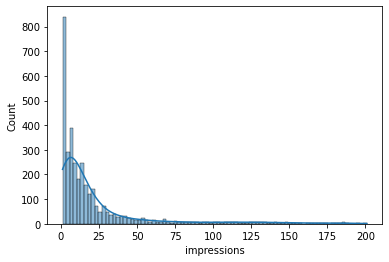

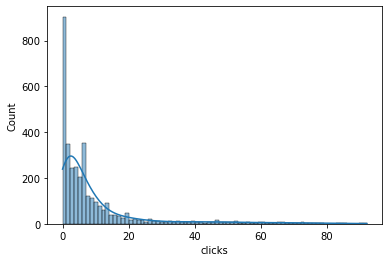

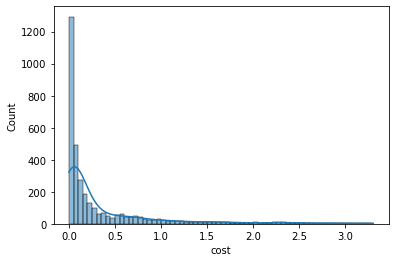

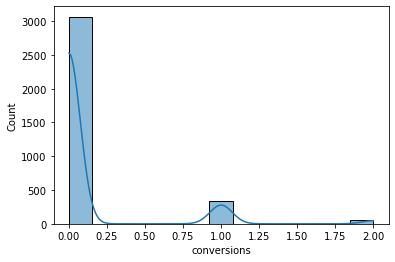

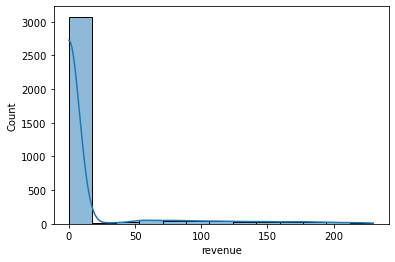

In [14]:
for col in df.columns:
    sns.histplot(df[col], kde = True)
    plt.show()

In [15]:
df.head(10)

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.0
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.0
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.0
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.0
5,01-08-2020,campaign 1,adgroup 2,ad 2,7,2,0.04,0,0.0
6,01-08-2020,campaign 1,adgroup 4,ad 2,6,3,0.05,0,0.0
7,01-08-2020,campaign 1,adgroup 1,ad 3,129,52,0.58,0,0.0
8,01-08-2020,campaign 1,adgroup 3,ad 3,104,56,0.56,0,0.0
9,01-08-2020,campaign 1,adgroup 4,ad 3,6,5,0.05,0,0.0
10,01-08-2020,campaign 1,adgroup 2,ad 3,4,0,0.00,0,0.0


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler , OneHotEncoder, LabelEncoder
from sklearn.preprocessing import PowerTransformer , QuantileTransformer, Normalizer


from sklearn.metrics import plot_confusion_matrix, accuracy_score, roc_auc_score, roc_curve, mean_squared_error, auc
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [174]:
lbl = LabelEncoder()
for col in df.columns:
    if df[col].dtypes == 'object':
           df[col] = lbl.fit_transform(df[col])   

In [18]:
df.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,2,0,0,0,24,6,0.08,0,0.0
1,2,0,1,0,1,0,0.00,0,0.0
2,2,0,2,0,13,4,0.04,0,0.0
3,2,0,3,0,5,4,0.08,0,0.0
5,2,0,1,11,7,2,0.04,0,0.0


In [175]:
for col in df_test.columns:
    if df_test[col].dtypes == 'object':
           df_test[col] = lbl.fit_transform(df_test[col])   

In [21]:
df_test.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,0,0,0,0,0.58,121,49,1
1,0,0,2,0,0.17,22,12,0
2,0,0,3,0,0.05,5,3,0
3,0,0,1,0,0.01,2,1,0
4,0,0,1,2,0.01,3,1,0


In [176]:
y = df['revenue']
X = df.drop('revenue', axis = 1)
X.head()
X.shape

(4571, 8)

In [177]:
scl = StandardScaler()
cols = X.columns
np_scaled = scl.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

cols1 = df_test.columns
np_scaled1 = scl.transform(df_test)
df_test = pd.DataFrame(np_scaled1, columns = cols1)

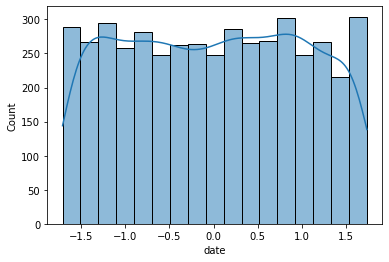

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


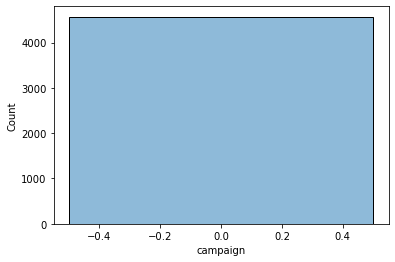

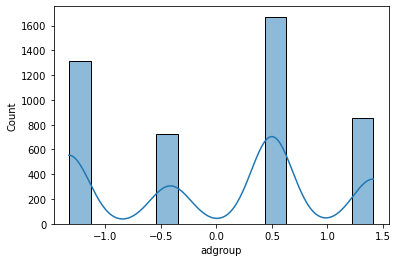

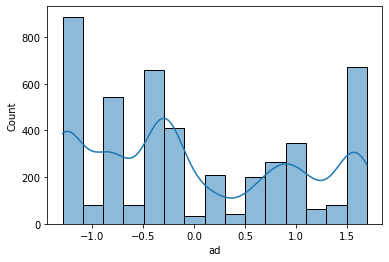

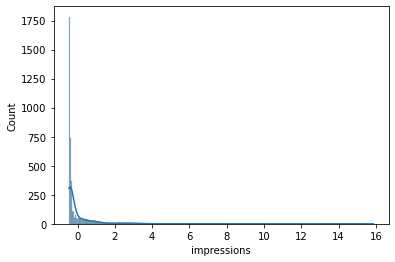

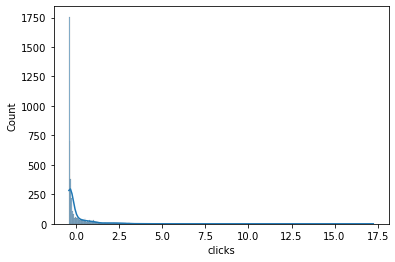

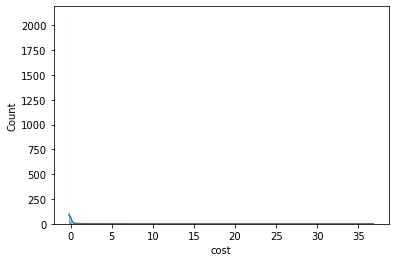

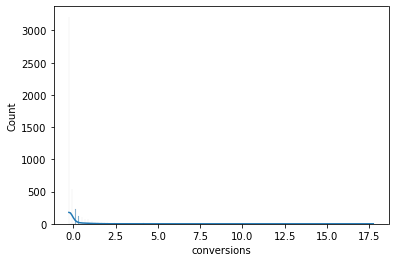

In [178]:
for col in X.columns:
    sns.histplot(X[col], kde = True)
    plt.show()

In [314]:
X_copy = X.copy()
test_copy = df_test.copy()
X_copy.drop('campaign', axis = 1 , inplace=True)
test_copy.drop('campaign', axis = 1 , inplace=True)

In [315]:
nr = Normalizer()
cols = X_copy.columns
np_scaled = nr.fit_transform(X_copy + 1 )
X_copy = pd.DataFrame(np_scaled, columns = cols)

cols1 = test_copy.columns
np_scaled1 = nr.transform(test_copy - 1)
test_copy = pd.DataFrame(np_scaled1, columns = cols1)

In [287]:
pt = PowerTransformer(method = 'box-cox')
cols1 = test_copy.columns
np_scaled1 = pt.fit_transform(1 + test_copy)
test_copy = pd.DataFrame(np_scaled1, columns = cols1)

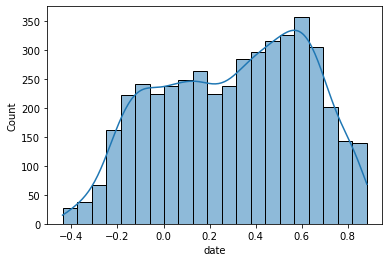

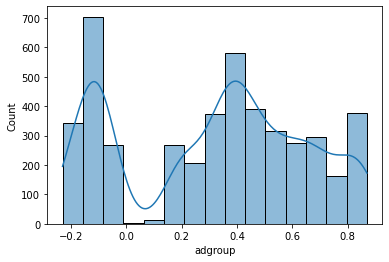

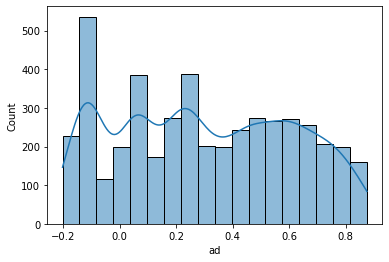

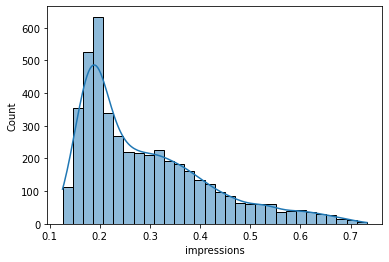

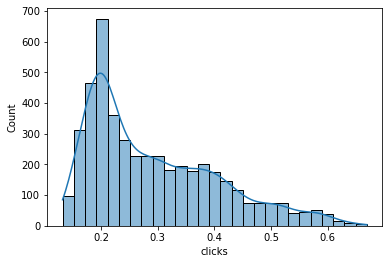

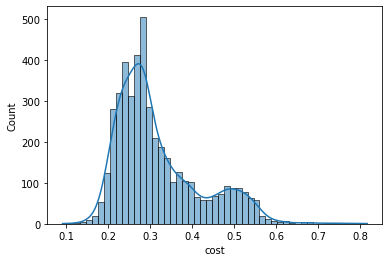

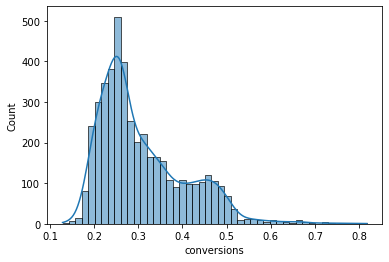

In [316]:
for col in X_copy.columns:
    sns.histplot(X_copy[col], kde = True)
    plt.show()

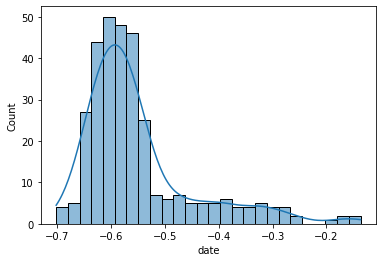

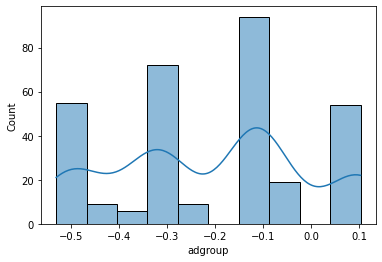

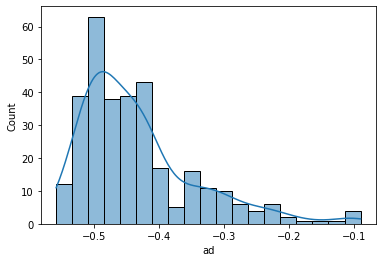

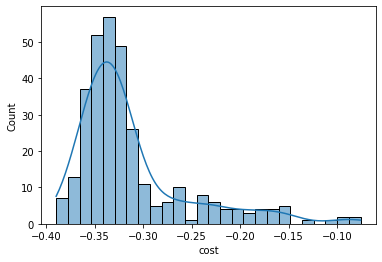

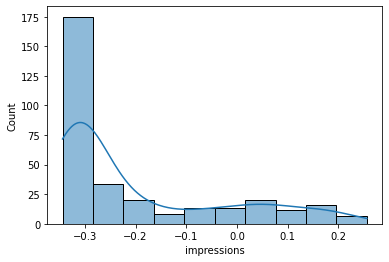

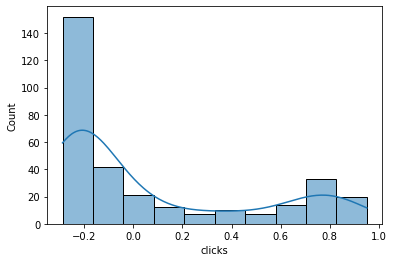

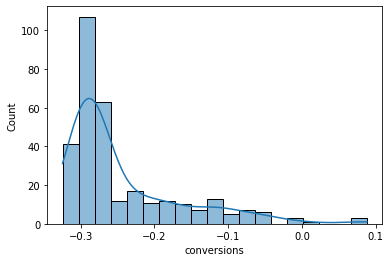

In [317]:
for col in test_copy.columns:
    sns.histplot(test_copy[col], kde = True)
    plt.show()

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size = 0.2 , random_state=0)

In [324]:
xgrf = XGBRFRegressor(n_estimators = 400,  learning_rate = 0.8, max_depth = 7, min_child_weight = 4, n_jobs = 10)
train_x = X_train.values
train_y = y_train.values
xgrf.fit(train_x,train_y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.8, max_delta_step=0,
               max_depth=7, min_child_weight=4, missing=nan,
               monotone_constraints='()', n_estimators=400, n_jobs=10,
               num_parallel_tree=400, objective='reg:squarederror',
               random_state=0, reg_alpha=0, scale_pos_weight=1,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [325]:
print(xgrf.score(X_train.values, y_train.values))
print(xgrf.score(X_test.values, y_test.values))
r2 = r2_score(y_test.values, xgrf.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xgrf.predict(X_test.values)))))

0.8467762460941662
0.6109244073812574
0.6109244073812574
RMSE 6.246504505280249


In [326]:
y_pred = xgrf.predict(test_copy.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XGRF_30thJune_optimized4.csv")

In [162]:
xg = XGBRegressor(n_estimators = 300,  learning_rate = 0.009 , max_depth = 9, min_child_weight = 4)
train_x = X_train.values
train_y = y_train.values
xg.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.009, max_delta_step=0, max_depth=9,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [163]:
print(xg.score(X_train.values, y_train.values))
print(xg.score(X_test.values, y_test.values))
r2 = r2_score(y_test.values, xg.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xg.predict(X_test.values)))))

0.9534000446981687
0.7618333392400132
0.7618333392400132
RMSE 2.9972105622963374


In [164]:
y_pred = xg.predict(test_copy.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XG_30thJune_optimized.csv")